# Dataset Column Descriptions

## Description
This dataset contains information about individuals, including demographic, socioeconomic, and employment-related attributes.

## Column Names and Descriptions

1. **age**: Represents the age of the individual.
2. **workclass**: Indicates the type of employment or work class of the individual (e.g., Private, Self-emp-inc, Local-gov).
3. **fnlwgt**: Stands for final weight. It is a sampling weight assigned to each observation, often used in survey sampling methods.
4. **education**: Represents the highest level of education achieved by the individual.
5. **educational-num**: Represents the numerical encoding of the education level.
6. **marital-status**: Indicates the marital status of the individual (e.g., Never-married, Married-civ-spouse, Widowed).
7. **occupation**: Describes the occupation or job role of the individual.
8. **relationship**: Indicates the individual's role in the family relationship (e.g., Own-child, Husband, Wife).
9. **race**: Represents the race of the individual (e.g., White, Black, Asian-Pac-Islander).
10. **gender**: Specifies the gender of the individual (e.g., Male, Female).
11. **capital-gain**: Refers to the capital gains made by the individual.
12. **capital-loss**: Refers to the capital losses experienced by the individual.
13. **hours-per-week**: Represents the number of hours worked per week by the individual.
14. **native-country**: Indicates the country of origin or nationality of the individual.
15. **income**: Represents the income level of the individual, often used as the target variable for classification tasks (e.g., <=50K, >50K).

These columns provide various demographic, socioeconomic, and employment-related information about the individuals in the dataset, which can be useful for various analytical purposes such as demographic profiling, income prediction, and understanding societal trends.


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [2]:
df = pd.read_csv(r"dataset\adult.csv")

In [3]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [5]:
df.columns = df.columns.str.strip().str.replace('-', '_')

df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational_num',
       'marital_status', 'occupation', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational_num  48842 non-null  int64 
 5   marital_status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital_gain     48842 non-null  int64 
 11  capital_loss     48842 non-null  int64 
 12  hours_per_week   48842 non-null  int64 
 13  native_country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


# Univariate Analysis - Discrete Data

In [7]:
discreate_df = df.select_dtypes(include=['object'])

numerical_df = df.select_dtypes(include=['int64', 'float64'])

In [8]:
print(discreate_df.columns)
print(numerical_df.columns)

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'gender', 'native_country', 'income'],
      dtype='object')
Index(['age', 'fnlwgt', 'educational_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')


In [9]:
def discrete_univariate_analysis(discrete_data, col_name):
    print("*"*10, col_name, "*"*10)
    print(discrete_data[col_name].agg(['count', 'nunique', 'unique']))
    print('Value Counts: \n', discrete_data[col_name].value_counts())
    print()

In [10]:
def visulalize_plot(column_name):
    
    # Create a bar plot using matplotlib
    plt.figure(figsize=(8, 6))
    df[column_name].value_counts().plot(kind='bar', color='skyblue')
    plt.title('Bar Plot of Color Counts')
    plt.xlabel('Color')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

    # Create a count plot using seaborn
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=column_name, palette='pastel')
    plt.title('Count Plot of Colors')
    plt.xlabel('Color')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

In [11]:
discrete_univariate_analysis(discreate_df,discreate_df.columns[0])

********** workclass **********
count                                                  48842
nunique                                                    9
unique     [Private, Local-gov, ?, Self-emp-not-inc, Fede...
Name: workclass, dtype: object
Value Counts: 
 workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64



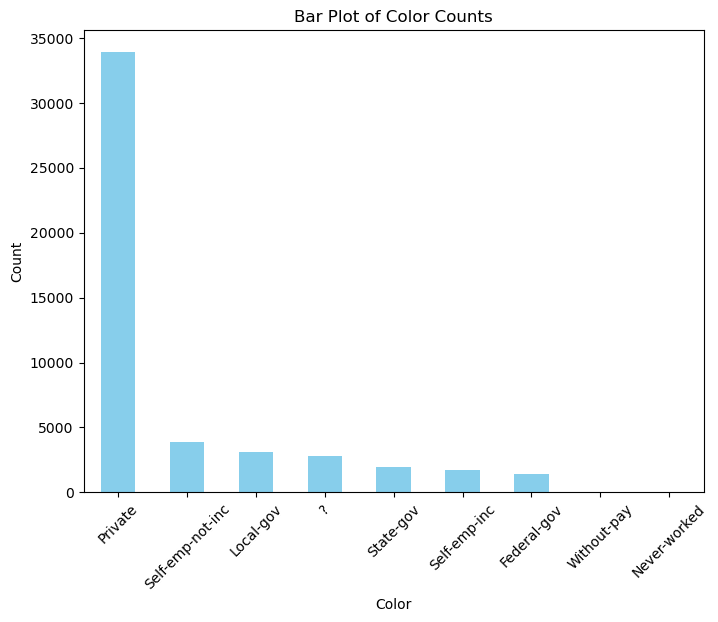

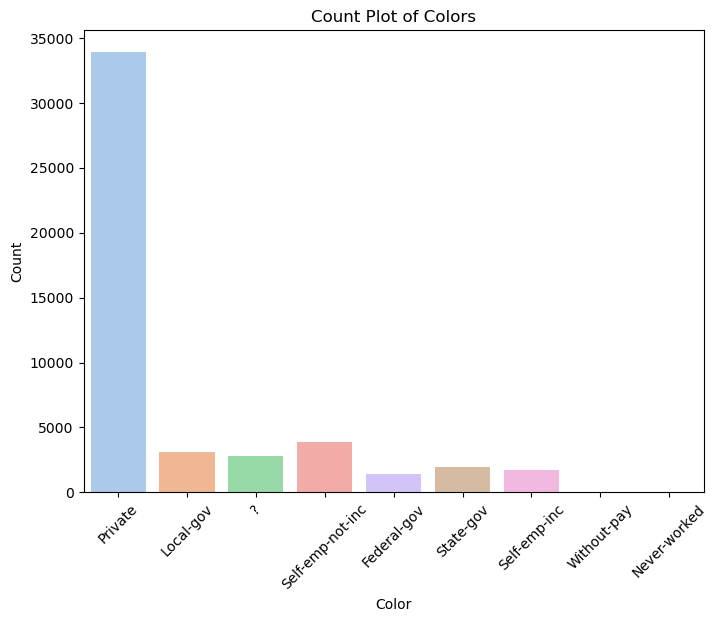

In [12]:
visulalize_plot('workclass')

In [13]:
discrete_univariate_analysis(discreate_df,discreate_df.columns[1])

********** education **********
count                                                  48842
nunique                                                   16
unique     [11th, HS-grad, Assoc-acdm, Some-college, 10th...
Name: education, dtype: object
Value Counts: 
 education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64



In [14]:
discrete_univariate_analysis(discreate_df,discreate_df.columns[2])

********** marital_status **********
count                                                  48842
nunique                                                    7
unique     [Never-married, Married-civ-spouse, Widowed, D...
Name: marital_status, dtype: object
Value Counts: 
 marital_status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64



In [15]:
discrete_univariate_analysis(discreate_df,discreate_df.columns[3])

********** occupation **********
count                                                  48842
nunique                                                   15
unique     [Machine-op-inspct, Farming-fishing, Protectiv...
Name: occupation, dtype: object
Value Counts: 
 occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64



In [16]:
discrete_univariate_analysis(discreate_df,discreate_df.columns[4])

********** relationship **********
count                                                  48842
nunique                                                    6
unique     [Own-child, Husband, Not-in-family, Unmarried,...
Name: relationship, dtype: object
Value Counts: 
 relationship
Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: count, dtype: int64



In [17]:
discrete_univariate_analysis(discreate_df,discreate_df.columns[5])

********** race **********
count                                                  48842
nunique                                                    5
unique     [Black, White, Asian-Pac-Islander, Other, Amer...
Name: race, dtype: object
Value Counts: 
 race
White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: count, dtype: int64



In [18]:
discrete_univariate_analysis(discreate_df,discreate_df.columns[6])

********** gender **********
count               48842
nunique                 2
unique     [Male, Female]
Name: gender, dtype: object
Value Counts: 
 gender
Male      32650
Female    16192
Name: count, dtype: int64



In [19]:
discrete_univariate_analysis(discreate_df,discreate_df.columns[7])

********** native_country **********
count                                                  48842
nunique                                                   42
unique     [United-States, ?, Peru, Guatemala, Mexico, Do...
Name: native_country, dtype: object
Value Counts: 
 native_country
United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                      

In [20]:
discrete_univariate_analysis(discreate_df,discreate_df.columns[8])

********** income **********
count              48842
nunique                2
unique     [<=50K, >50K]
Name: income, dtype: object
Value Counts: 
 income
<=50K    37155
>50K     11687
Name: count, dtype: int64



# Chi-Square Goodness-of-Fit Test Example

## Introduction

In statistical analysis, the Chi-Square Goodness-of-Fit Test is used to determine whether observed categorical data matches some expected distribution or hypothesis. This test is commonly applied to assess whether the observed frequencies in a dataset differ significantly from the expected frequencies.

In this example, we'll demonstrate how to perform a Chi-Square Goodness-of-Fit Test using Python's scipy library.

## Example: Ice Cream Flavor Preferences

Suppose we conducted a study on the preferences of people regarding their favorite ice cream flavors. We categorized the preferences into four flavors: Vanilla, Chocolate, Strawberry, and Mint Chip.

### Observed Data

We collected data from a sample of 200 individuals and observed the following preferences:

- Vanilla: 60
- Chocolate: 50
- Strawberry: 40
- Mint Chip: 50

### Hypothesis

We want to test whether the observed frequencies of ice cream flavor preferences match the expected frequencies based on a hypothesis that assumes all flavors are equally popular.

### Expected Frequencies

Under the null hypothesis that all flavors are equally popular, each flavor is expected to be preferred by 25% of the population.

Expected frequencies:

- Vanilla: 0.25×200 = 50
- Chocolate: 0.25×200 = 50
- Strawberry: 0.25×200 = 50
- Mint Chip: 0.25×200 = 50
Now, we can perform the Chi-Square Goodness-of-Fit Test to determine whether there is a significant difference between the observed and expected frequencies.

### Performing the Test

We'll use Python's scipy library to perform the Chi-Square Goodness-of-Fit Test.


In [21]:
from scipy.stats import chisquare

# Observed frequencies
observed = [60, 50, 40, 50]

# Expected frequencies
expected = [50, 50, 50, 50]

# Perform Chi-Square Goodness-of-Fit Test
chi2_stat, p_val = chisquare(observed, f_exp=expected)

print("Chi-Square Statistic:", chi2_stat)
print("p-value:", p_val)

Chi-Square Statistic: 4.0
p-value: 0.26146412994911117


Putting it together:

The Chi-Square statistic (4.0) tells you how big the difference is between what you expected and what you observed.
The p-value (0.2615) tells you whether this difference is likely to be real or just a fluke.

In your case, since the p-value is higher than a commonly chosen significance level like 0.05, it suggests that the difference you observed might just be due to chance. So, you can't be confident that there's a real difference between what you expected and what you saw.

## Example: Mode of Transportation Preferences

Suppose we conducted a survey on the preferred mode of transportation for commuters in a city. We categorized the preferences into four modes: Car, Bus, Train, and Bicycle.

### Observed Data

We collected data from a sample of commuters and observed the following preferences:

- Car: 50
- Bus: 50
- Train: 50
- Bicycle: 50

### Hypothesis

We hypothesize the following:

- **Null Hypothesis (H0)**: The observed frequencies match the expected frequencies. In other words, each mode of transportation is equally popular among commuters.
- **Alternative Hypothesis (H1)**: The observed frequencies do not match the expected frequencies. There is a significant difference in the popularity of different modes of transportation among commuters.

### Expected Frequencies

Under the null hypothesis, each mode of transportation is expected to be preferred by 25% of the commuters.

Expected frequencies:

- Car: 50
- Bus: 50
- Train: 50
- Bicycle: 50

### Performing the Test

We'll use Python's scipy library to perform the Chi-Square Goodness-of-Fit Test.

In [22]:
from scipy.stats import chisquare

# Observed frequencies
observed = [50, 50, 50, 50]

# Expected frequencies
expected = [50, 50, 50, 50]

# Perform Chi-Square Goodness-of-Fit Test
chi2_stat, p_val = chisquare(observed, f_exp=expected)

print("Chi-Square Statistic:", chi2_stat)
print("p-value:", p_val)

Chi-Square Statistic: 0.0
p-value: 1.0


In [23]:
from scipy.stats import chisquare

# Observed frequencies
observed = [60, 40, 60, 40]

# Expected frequencies
expected = [50, 50, 50, 50]

# Perform Chi-Square Goodness-of-Fit Test
chi2_stat, p_val = chisquare(observed, f_exp=expected)

print("Chi-Square Statistic:", chi2_stat)
print("p-value:", p_val)

Chi-Square Statistic: 8.0
p-value: 0.04601170568923136


Certainly, let's simplify it:

* **Chi-Square Statistic**: The Chi-Square Statistic measures how much the observed frequencies deviate from the expected frequencies. A value of 0.0 means there is no deviation at all, indicating that the observed and expected frequencies match perfectly.

* **p-value**: The p-value tells us whether this perfect match between observed and expected frequencies could have happened by chance. A p-value of 1.0 means there's a 100% chance that the observed match occurred by random chance alone.

In summary, both the Chi-Square Statistic and the p-value indicate that there's no difference between the observed and expected frequencies. This supports the null hypothesis that all modes of transportation are equally popular among commuters.

**Chi-Square Statistic**: Imagine you have a bunch of categories, like different types of fruit (apples, oranges, bananas, etc.), and you're comparing how many times each type appears in a dataset. The Chi-Square Statistic helps you figure out if the actual numbers you see (observed frequencies) are really different from what you'd expect to see just by chance (expected frequencies). *If the observed and expected numbers are exactly the same, the Chi-Square value is 0.0, meaning there's no difference between what you see and what you'd expect*.

**p-value**: Now, let's say you calculated the *Chi-Square value and found it's not 0.0, which means there's some difference between observed and expected frequencies.* The p-value tells you if this difference is significant or just due to random chance. A p-value of 1.0 means there's a 100% chance that the difference you observed happened by random chance alone, so it's not significant. On the other hand, a very small p-value, like 0.05 or less, means the difference is unlikely to be due to chance and is probably real.

#### Example 3: use dataset `Gender's` columns

In [24]:
def chi_square_good_fit(observed_frequencies, expected_frequencies, significance_level):
    stat, p_value = stats.chisquare(observed_frequencies, expected_frequencies)
    
    print('stat=%.3f, p_value=%.3f' % (stat, p_value))
    
    if p_value < significance_level:
        print('Reject null hypothesis (H0): The observed frequencies do not match the expected frequencies.')
    else:
        print('Fail to Reject null hypothesis (H0): The observed frequencies match the expected frequencies.')

In [25]:
print(df['gender'].value_counts().sum())
df['gender'].value_counts()

48842


gender
Male      32650
Female    16192
Name: count, dtype: int64

In [26]:
sample = df['gender']
total = sample.value_counts().sum()
print(total//2, total//2)

observed_freq = sample.value_counts().tolist()
expected_freq = [total//2, total//2]

chi_square_good_fit(observed_freq, expected_freq, significance_level=0.05)

24421 24421
stat=5545.755, p_value=0.000
Reject null hypothesis (H0): The observed frequencies do not match the expected frequencies.


## Univariate Analysis - Numerical Data

In [27]:
def numerical_univariate_analysis(numerical_data):
    for col_name in numerical_data:
        print("*"*10, col_name, "*"*10)
        print(numerical_data[col_name].agg(['min', 'max', 'mean', 'median', 'std']))
        print()

In [28]:
numerical_univariate_analysis(numerical_df)

********** age **********
min       17.000000
max       90.000000
mean      38.643585
median    37.000000
std       13.710510
Name: age, dtype: float64

********** fnlwgt **********
min       1.228500e+04
max       1.490400e+06
mean      1.896641e+05
median    1.781445e+05
std       1.056040e+05
Name: fnlwgt, dtype: float64

********** educational_num **********
min        1.000000
max       16.000000
mean      10.078089
median    10.000000
std        2.570973
Name: educational_num, dtype: float64

********** capital_gain **********
min           0.000000
max       99999.000000
mean       1079.067626
median        0.000000
std        7452.019058
Name: capital_gain, dtype: float64

********** capital_loss **********
min          0.000000
max       4356.000000
mean        87.502314
median       0.000000
std        403.004552
Name: capital_loss, dtype: float64

********** hours_per_week **********
min        1.000000
max       99.000000
mean      40.422382
median    40.000000
std       12

In [29]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load the Titanic dataset directly from seaborn
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


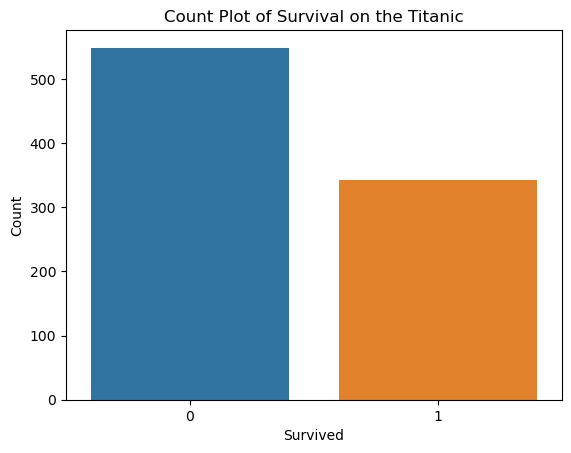

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a count plot of the 'Survived' column
sns.countplot(data=titanic, x='survived')

# Add title and labels
plt.title('Count Plot of Survival on the Titanic')
plt.xlabel('Survived')
plt.ylabel('Count')

# Display the plot
plt.show()

<Axes: xlabel='survived'>

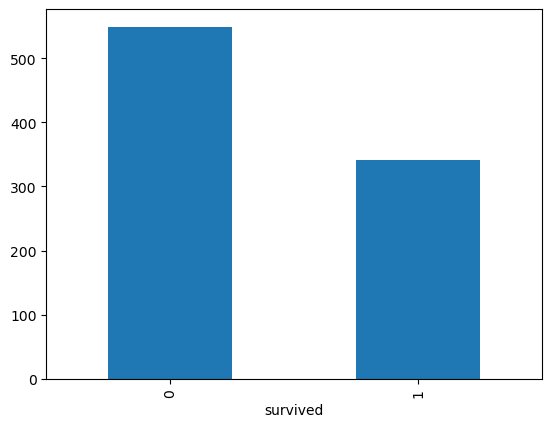

In [31]:
titanic.survived.value_counts().plot(kind='bar')

<Axes: xlabel='pclass', ylabel='count'>

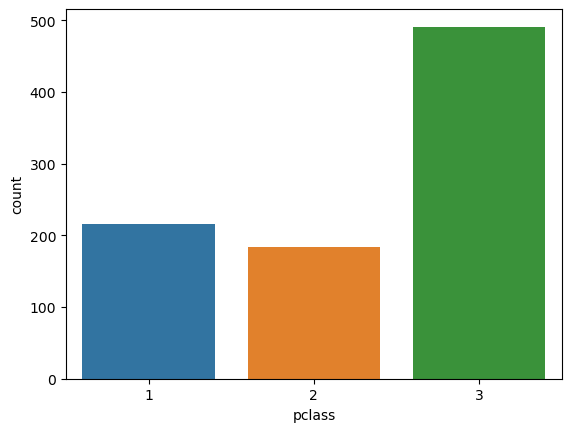

In [32]:
sns.countplot(data=titanic, x='pclass')
#sns.countplot(titanic['pclass'])

<Axes: ylabel='count'>

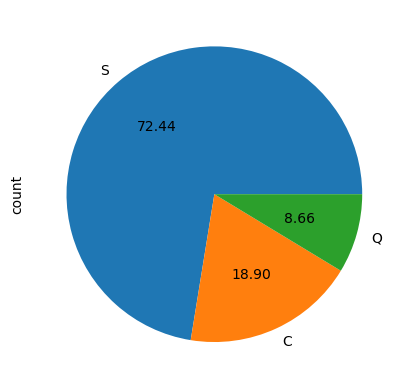

In [33]:
titanic['embarked'].value_counts().plot(kind='pie', autopct='%.2f')

<Axes: ylabel='count'>

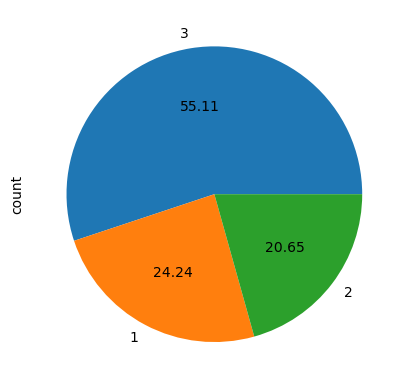

In [34]:
titanic['pclass'].value_counts().plot(kind='pie', autopct='%.2f')

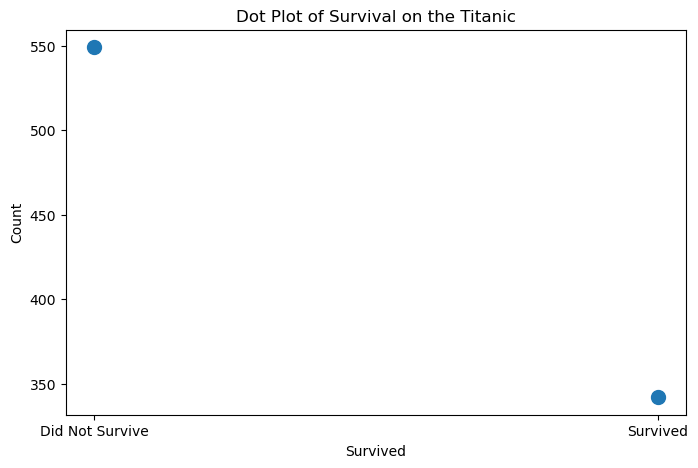

In [35]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load the Titanic dataset
titanic = sns.load_dataset('titanic')

# Create a dot plot for the 'Survived' column
survival_counts = titanic['survived'].value_counts().sort_index()
categories = ['Did Not Survive', 'Survived']

plt.figure(figsize=(8, 5))
plt.plot(categories, survival_counts, 'o', markersize=10, linestyle='None')

# Add title and labels
plt.title('Dot Plot of Survival on the Titanic')
plt.xlabel('Survived')
plt.ylabel('Count')

# Show plot
plt.show()


In [36]:
import seaborn as sns
import pandas as pd

# Load the Titanic dataset
titanic = sns.load_dataset('titanic')

# Create a frequency table for the 'Survived' column
frequency_table = titanic['survived'].value_counts().reset_index()
frequency_table.columns = ['Survived', 'Count']

print(frequency_table)


   Survived  Count
0         0    549
1         1    342


In [37]:
import seaborn as sns
import pandas as pd

# Load the Titanic dataset
titanic = sns.load_dataset('titanic')

# Select the 'pclass' column
pclass_data = titanic['pclass']

# 3. Count: The number of non-null observations
count = pclass_data.count()

# 4. Nunique: The number of unique values
nunique = pclass_data.nunique()

# 5. Unique: The unique values
unique = pclass_data.unique()

# 6. Mode: The most frequent value
mode = pclass_data.mode()[0]

# 7. Value_counts: The frequency of each unique value
value_counts = pclass_data.value_counts()

# Print the results
print(f"Count: {count}")
print(f"Nunique: {nunique}")
print(f"Unique: {unique}")
print(f"Mode: {mode}")
print(f"Value_counts:\n{value_counts}")


Count: 891
Nunique: 3
Unique: [3 1 2]
Mode: 3
Value_counts:
pclass
3    491
1    216
2    184
Name: count, dtype: int64


In [38]:
titanic.shape

(891, 15)

In [39]:
import scipy.stats as stats

# Observed frequencies of blood types
observed = [110, 85, 65, 40]

# Expected frequencies based on the population distribution
expected = [0.4 * sum(observed), 0.3 * sum(observed), 0.2 * sum(observed), 0.1 * sum(observed)]

# Perform Chi-Square Test
chi2, p = stats.chisquare(observed, expected)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

Chi-Square Statistic: 4.861111111111112
P-value: 0.18225438819712722


In [40]:
import pandas as pd
from scipy.stats import chisquare


# Observed frequencies of 'pclass'
observed = titanic['pclass'].value_counts().sort_index()

# Expected frequencies (assuming equal distribution)
expected = [len(titanic) / 3] * 3

# Perform Chi-Square Test
chi2, p_value = chisquare(observed, expected)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p_value}")

Chi-Square Statistic: 191.8047138047138
P-value: 2.2394202231028854e-42


In [41]:
import scipy.stats as stats

# Observed frequencies of blood types
observed = [110, 85, 65, 40]

# Expected frequencies based on the population distribution
expected = [0.4 * sum(observed), 0.3 * sum(observed), 0.2 * sum(observed), 0.1 * sum(observed)]

# Perform Chi-Square Test
chi2, p = stats.chisquare(observed, expected)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")


Chi-Square Statistic: 4.861111111111112
P-value: 0.18225438819712722


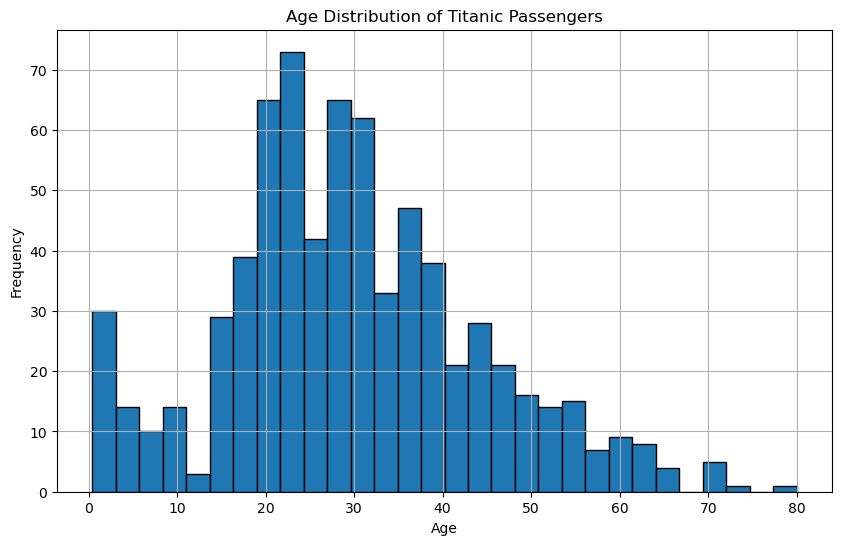

In [42]:
import matplotlib.pyplot as plt

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(titanic['age'], bins=30, edgecolor='black')
plt.title('Age Distribution of Titanic Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

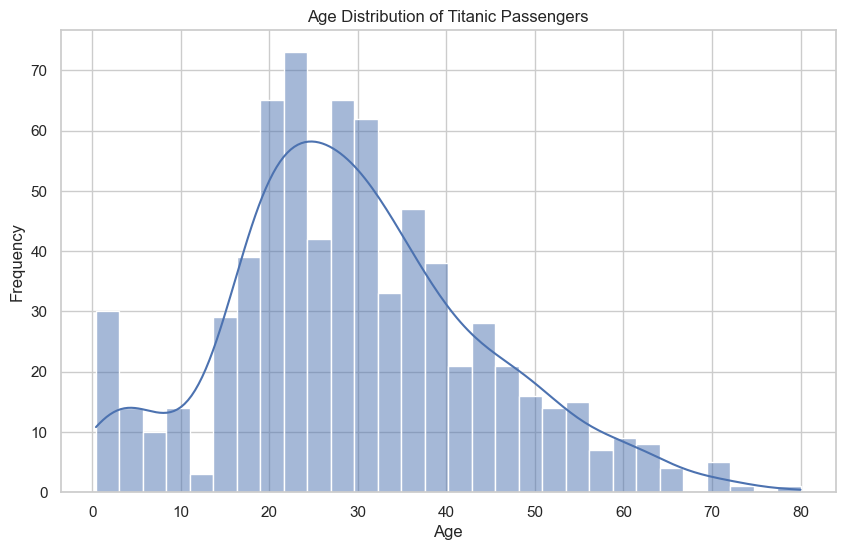

In [43]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Plot the distribution of the 'Age' column
plt.figure(figsize=(10, 6))
sns.histplot(titanic['age'], kde=True, bins=30)
plt.title('Age Distribution of Titanic Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

C:\Users\visha\AppData\Local\Temp\ipykernel_17116\1560808282.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic['age'], bins=30, kde=True, hist=True, rug=False)


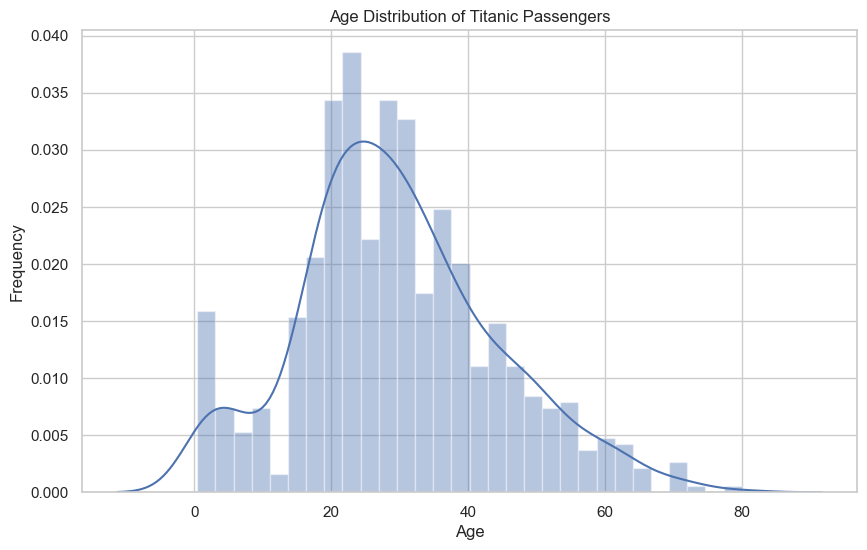

In [44]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Plot the distribution of the 'Age' column using distplot
plt.figure(figsize=(10, 6))
sns.distplot(titanic['age'], bins=30, kde=True, hist=True, rug=False)
plt.title('Age Distribution of Titanic Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


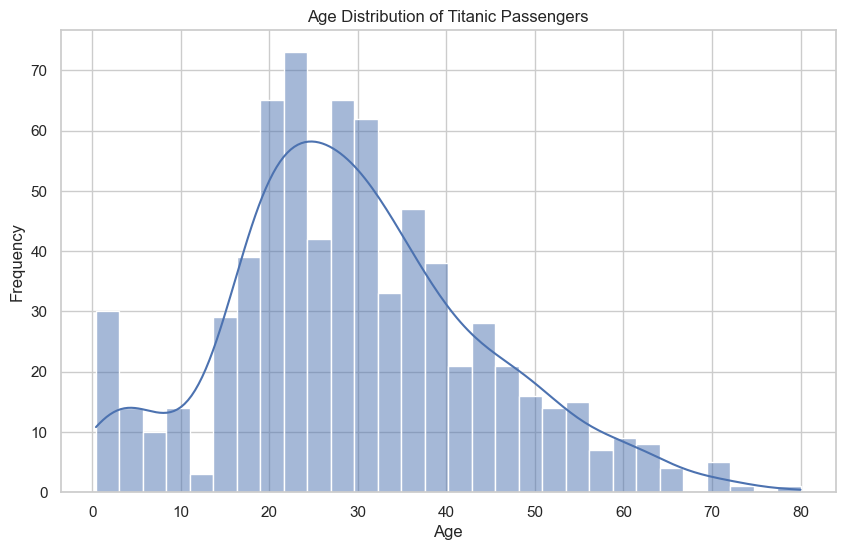

In [45]:
# Plot the distribution of the 'Age' column using histplot and kdeplot
plt.figure(figsize=(10, 6))
sns.histplot(titanic['age'], bins=30, kde=True)
plt.title('Age Distribution of Titanic Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


ValueError: array must not contain infs or NaNs

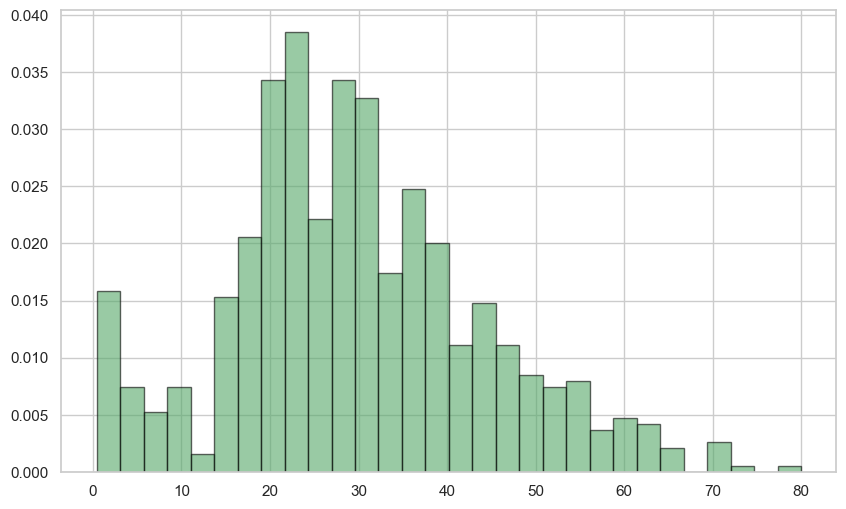

In [46]:

from scipy.stats import gaussian_kde
# Extract the 'Age' column
ages = titanic['age']

# Create a histogram
plt.figure(figsize=(10, 6))
count, bins, ignored = plt.hist(ages, bins=30, density=True, alpha=0.6, color='g', edgecolor='black')

# Create a KDE plot
kde = gaussian_kde(ages)
kde_xs = np.linspace(ages.min(), ages.max(), 300)
plt.plot(kde_xs, kde(kde_xs), 'k', lw=2)

# Add titles and labels
plt.title('Age Distribution of Titanic Passengers')
plt.xlabel('Age')
plt.ylabel('Density')

# Show the plot
plt.show()


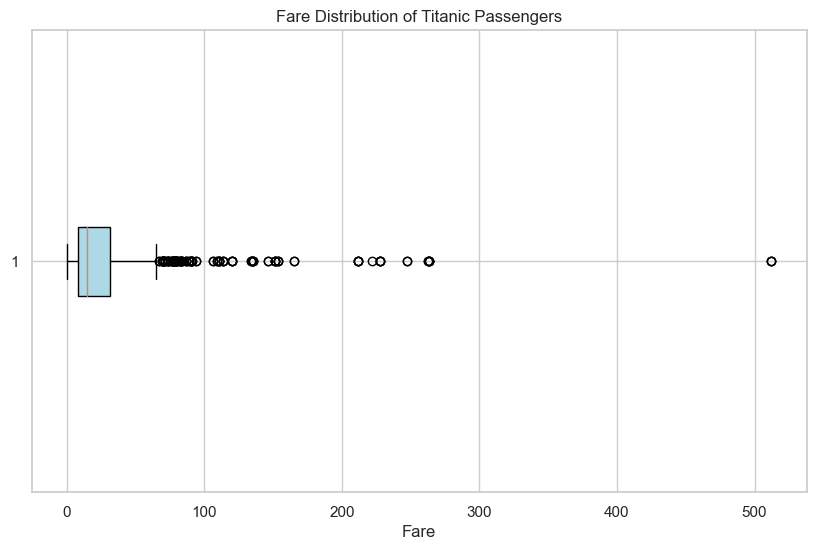

In [ ]:
# Extract the 'Fare' column
fares = titanic['fare']

# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(fares, vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))

# Add titles and labels
plt.title('Fare Distribution of Titanic Passengers')
plt.xlabel('Fare')

# Show the plot
plt.show()


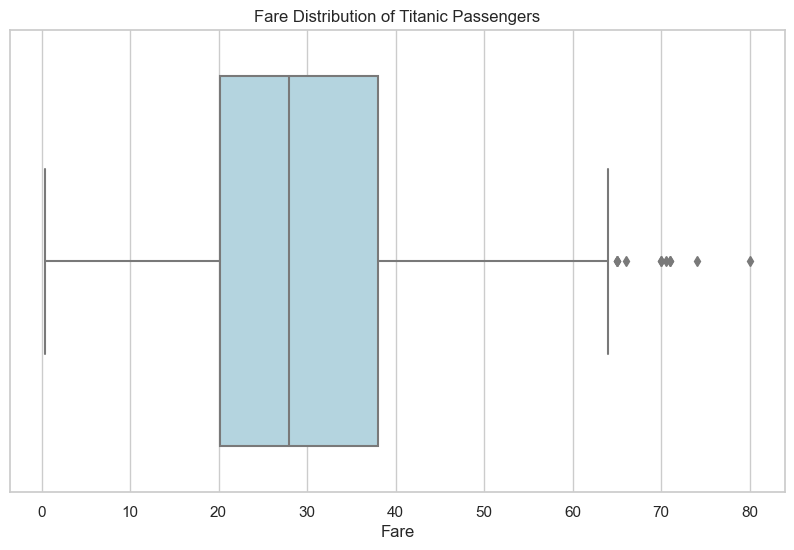

In [ ]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=titanic['age'], color='lightblue')

# Add titles and labels
plt.title('Fare Distribution of Titanic Passengers')
plt.xlabel('Fare')

# Show the plot
plt.show()


<Axes: xlabel='age'>

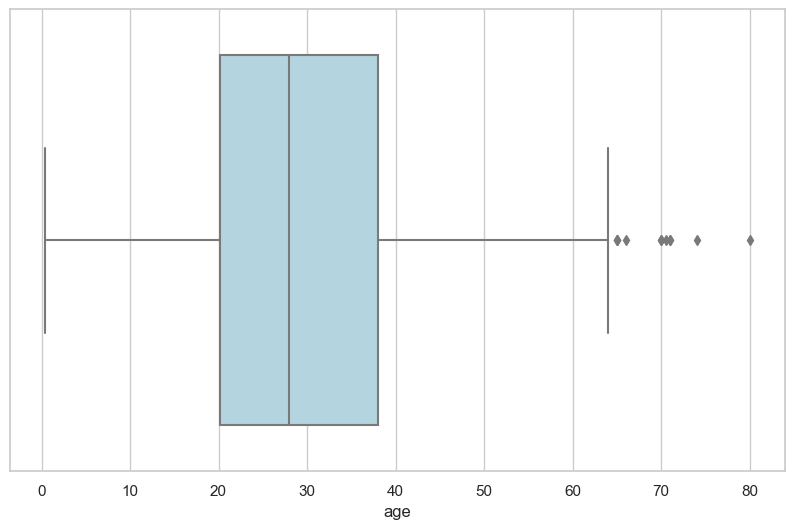

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=titanic['age'], color='lightblue')

In [48]:
titanic['age'].min()

0.42

In [47]:
titanic['age'].max()

80.0

In [49]:
titanic['age'].std()

14.526497332334044

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_df = pd.read_csv(url)
age_std = titanic_df['Age'].std()
print(f'Standard Deviation of Age: {age_std}')

Standard Deviation of Age: 14.526497332334044


In [2]:
age_std = titanic_df['Age'].std()
print(f'Standard Deviation of Age: {age_std}')
# Insight: High standard deviation indicates diverse age groups.


Standard Deviation of Age: 14.526497332334044


In [3]:
from scipy.stats import ttest_ind

survivors = titanic_df[titanic_df['Survived'] == 1]['Age'].dropna()
non_survivors = titanic_df[titanic_df['Survived'] == 0]['Age'].dropna()

t_stat, p_value = ttest_ind(survivors, non_survivors)
print(f'T-statistic: {t_stat}, P-value: {p_value}')


T-statistic: -2.06668694625381, P-value: 0.03912465401348249


In [4]:
first_class_age_std = titanic_df[titanic_df['Pclass'] == 1]['Age'].std()
second_class_age_std = titanic_df[titanic_df['Pclass'] == 2]['Age'].std()
third_class_age_std = titanic_df[titanic_df['Pclass'] == 3]['Age'].std()

print(f'First Class Age Std: {first_class_age_std}')
print(f'Second Class Age Std: {second_class_age_std}')
print(f'Third Class Age Std: {third_class_age_std}')


First Class Age Std: 14.80285589645046
Second Class Age Std: 14.001076812476201
Third Class Age Std: 12.495398210982415
